# Nombre del proyecto
***Diseño de lentes de contacto***

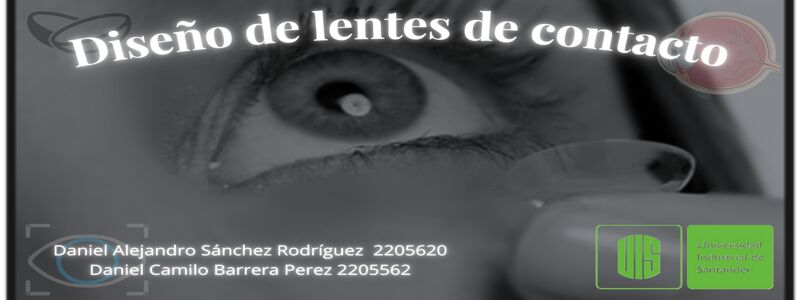

## Integrantes del grupo
* Daniel Alejandro Sánchez Rodríguez
* Daniel Camilo Barrera Perez

## Descripcion de los datsets

***Datasets Fotos de ojos***

Durante la fase de recolección de datos de la investigación, se proporcionó información a los participantes sobre el estudio y se tomaron fotografías de los ojos de 96 personas de edades comprendidas entre 3 y 64 años. Se recopilaron al menos diez imágenes del ojo derecho e izquierdo de cada persona, junto con su edad y género. Se obtuvieron un total de 1980 imágenes de los participantes, con algunas personas teniendo más de diez imágenes. Se aseguró que las fotografías fueran tomadas desde diferentes ángulos y condiciones de iluminación para evitar repeticiones. Se desarrolló una convención de nomenclatura que incluía un ID de persona único, edad, identificación de género y número de la fotografía para distinguir cada imagen. Este conjunto de datos se utilizó en un artículo titulado "Clasificación de imágenes oculares según detalles de la persona con los algoritmos de aprendizaje de transferencia"



*   ID de persona: Es un valor de código único para cada persona fotografiada. Este valor oscila entre 1 y 100.
*   Edad: La edad se escribe directamente como un número para expresar la edad de la persona. Este valor varía entre 3-64.
*   Identificación de género: El valor de 1 se expresa si la persona fotografiada es hombre, y el valor de 0 si es una mujer.
*   Identificación con foto: Debido al hecho de que se tomó más de una foto para cada persona, cada foto se numeró secuencialmente del 1 al 10.

https://www.kaggle.com/datasets/emrahaydemr/photos-of-eyes?resource=download

***Datasets Clasificación de enfermedades oculares***

El conjunto de datos consiste en imágenes de retinopatía normal, retinopatía diabética, cataratas y glaucoma, donde cada clase tiene aproximadamente 1000 imágenes. Estas imágenes se recogen de varios sorces como IDRiD, reconocimiento Oculur, HRF, etc.

https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification


In [32]:
#@title librerias
import pandas as pd
import cv2
import os
import IPython.display as display
from PIL import Image
from io import BytesIO
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.datasets import *
import scipy.stats as stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Datsets

In [20]:
#@title cargar dataset
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/datasets_proyecto/datasets_fotos_ojos/DatasetDetail.csv', sep=",")
type(df)

imagenes_ojos = '/content/drive/MyDrive/datasets_proyecto/datasets_fotos_ojos/Photos'

lista_imagenes_archivos = os.listdir(imagenes_ojos)

lista_imagenes = []

for lista_imagen in lista_imagenes_archivos:
    image_path = imagenes_ojos +'/'+ lista_imagen
    lista_imagenes.append(image_path)

df_imagenes=pd.DataFrame(lista_imagenes)

df[["No","Age","Gender","PhotoNo"]] = df["Person No;Age;Gender;Photo No"].str.split(";", expand=True)

c_a_e='Person No;Age;Gender;Photo No'
df = df.drop(c_a_e, axis=1)
print("tamaño: ", df.columns, df.shape)

df_concatenado = pd.concat([df, df_imagenes], axis=1, ignore_index=True)
print('su tamaño y nombre de columnas', df_concatenado.columns, df_concatenado.shape)
nuevos_nombre=['Person_No', 'Age', 'Gender', 'Photo_No','Photos']
df_concatenado.columns=nuevos_nombre
print(df_concatenado)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tamaño:  Index(['No', 'Age', 'Gender', 'PhotoNo'], dtype='object') (1980, 4)
su tamaño y nombre de columnas RangeIndex(start=0, stop=5, step=1) (1980, 5)
     Person_No Age Gender Photo_No  \
0          100  49      0        1   
1          100  49      0       10   
2          100  49      0       11   
3          100  49      0       12   
4          100  49      0       13   
...        ...  ..    ...      ...   
1975         9  27      0        5   
1976         9  27      0        6   
1977         9  27      0        7   
1978         9  27      0        8   
1979         9  27      0        9   

                                                 Photos  
0     /content/drive/MyDrive/datasets_proyecto/datas...  
1     /content/drive/MyDrive/datasets_proyecto/datas...  
2     /content/drive/MyDrive/datasets_proyecto/datas...  
3     /content/drive/MyDrive

In [21]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Person_No  1980 non-null   object
 1   Age        1980 non-null   object
 2   Gender     1980 non-null   object
 3   Photo_No   1980 non-null   object
 4   Photos     1980 non-null   object
dtypes: object(5)
memory usage: 77.5+ KB


# Arreglo de los datasets

Se arreglan las imagenes para que sea mejor su uso en el procedimiento y se dejen manejar mejor

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np
import pandas as pd
enfermedad = "normal" # @param {type:"string"}
archivo = "enfermedades" #@param {type:"string"}
input_images_path = "/content/drive/MyDrive/datasets_proyecto/datasets_enfermedades/dataset/"+enfermedad
files_names = os.listdir(input_images_path)
data = []


for file_name in files_names:
  image_path = input_images_path + "/" + file_name
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image,(100,100))
  data.append(np.reshape(np.array(image),(100*100)))

columns = []
count = 0
for x in data[0]:
    count += 1
    columns.append("pixel" + str(count))


df = pd.DataFrame(data,columns=columns)
df["Enfermedad"] = enfermedad
#@markdown Pon True si deseas guardar el header de tu data frame en tu csv
#@markdown (Recomendacion poner True solo la primera vez de ejecucion)
header = False # @param ["True", "False"] {type:"raw"}
df.to_csv("/content/drive/MyDrive/datasets_proyecto/datasets_enfermedades/"+archivo+".csv", index=False, mode="a",header=False)

In [ ]:
df_enfermedades=pd.read_csv('/content/drive/MyDrive/datasets_proyecto/datasets_enfermedades/enfermedades.csv')
df_enfermedades

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000,Enfermedad
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cataract
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cataract
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cataract
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cataract
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cataract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
4214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
4215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal
4216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,normal


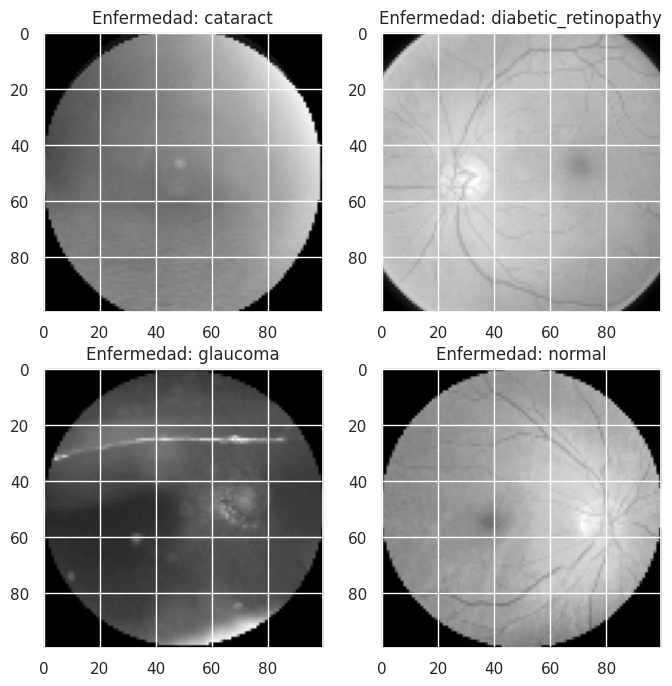

In [ ]:
cataract = df_enfermedades[df_enfermedades["Enfermedad"] == "cataract"]
diabetic_retinopathy = df_enfermedades[df_enfermedades["Enfermedad"] == "diabetic_retinopathy"]
glaucoma = df_enfermedades[df_enfermedades["Enfermedad"] == "glaucoma"]
normal = df_enfermedades[df_enfermedades["Enfermedad"] == "normal"]

array_a = cataract.iloc[0,0:-1]
array_b = diabetic_retinopathy.iloc[0,0:-1]
array_c = glaucoma.iloc[0,0:-1]
array_d = normal.iloc[0,0:-1]


dim = int(np.sqrt(array_a.shape[0]))
image_a = np.array(array_a, dtype="float").reshape(dim,dim)
image_b = np.array(array_b, dtype="float").reshape(dim,dim)
image_c = np.array(array_c, dtype="float").reshape(dim,dim)
image_d = np.array(array_d, dtype="float").reshape(dim,dim)

plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.imshow(image_a, cmap="gray");
plt.title("Enfermedad: cataract")
plt.subplot(2,2,2)
plt.imshow(image_b, cmap="gray");
plt.title("Enfermedad: diabetic_retinopathy")
plt.subplot(2,2,3)
plt.imshow(image_c, cmap="gray");
plt.title("Enfermedad: glaucoma")
plt.subplot(2,2,4)
plt.imshow(image_d, cmap="gray");
plt.title("Enfermedad: normal");

Se hace un mapeo para que el dataset no tengas valores string

In [ ]:
mapeo = {'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal':3}
df_enfermedades['enfermedades'] = df_enfermedades['Enfermedad'].map(mapeo)

df_enfermedades.drop('Enfermedad', axis=1, inplace=True)

In [ ]:
df_enfermedades

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel9992,pixel9993,pixel9994,pixel9995,pixel9996,pixel9997,pixel9998,pixel9999,pixel10000,enfermedades
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


# Información de los datasets

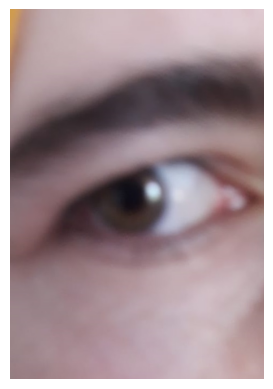

No         100
Age         49
Gender       0
PhotoNo      1
Name: 0, dtype: object


In [ ]:
carpeta_imagenes = '/content/drive/MyDrive/datasets_proyecto/datasets_fotos_ojos/Photos'

indice=0

combined_values = f"{df.iloc[indice]['No']}_{df.iloc[indice]['Age']}_{df.iloc[indice]['Gender']}_{df.iloc[indice]['PhotoNo']}.jpg"
valor=df.iloc[indice]


nombre_imagen = combined_values
ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)

if os.path.exists(ruta_imagen):
    imagen = Image.open(ruta_imagen)
    plt.imshow(imagen)
    plt.axis('off')
    plt.show()
else:
    print(f"La imagen {nombre_imagen} no existe en la carpeta especificada.")

print(valor)

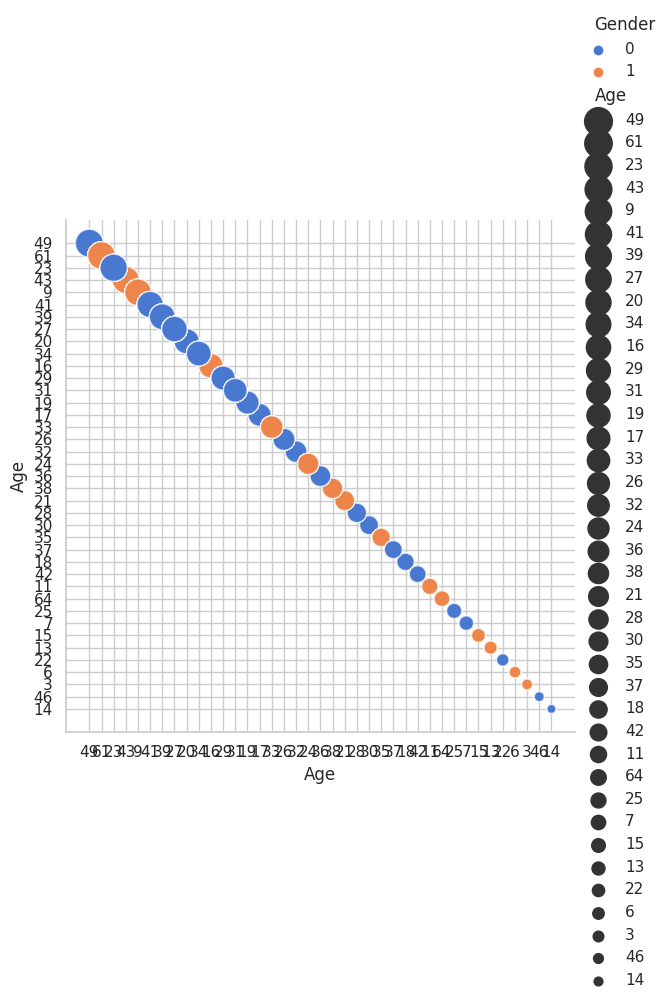

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df_concatenado[df_concatenado["Gender"] == 0]

sns.relplot(x="Age", y="Age", hue="Gender", size="Age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

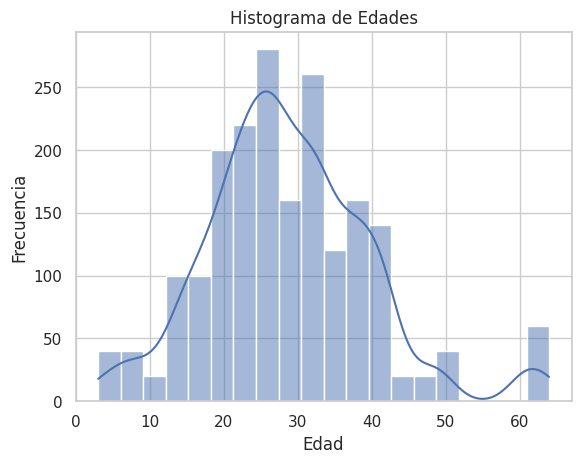

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_concatenado, x="Age", bins=20, kde=True)
plt.title("Histograma de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# RandomForest, DecisionTree, Supportvector para clasificación

In [ ]:
#@title Gasussian
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = df_enfermedades.values[:,:-1]
y = df_enfermedades.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
est = GaussianNB()

est.fit(X_train,y_train)
print("el accuracy es: %.3f"%accuracy_score(est.predict(X_test), y_test))

s = cross_val_score(est, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

el accuracy es: 0.442
[0.43246445 0.44668246 0.42535545 0.44365362 0.42467378]
accuracy 0.435 (+/- 0.00913)


Accuracy para 2 folds - Media: 0.01666666666666667, Desviación estándar: 0.007160326706443346
Accuracy para 3 folds - Media: 0.010101010101010102, Desviación estándar: 0.00505050505050505
Accuracy para 4 folds - Media: 0.00808080808080808, Desviación estándar: 0.00909090909090909
Accuracy para 5 folds - Media: 0.006565656565656565, Desviación estándar: 0.007160326706443347
Accuracy para 6 folds - Media: 0.0025252525252525255, Desviación estándar: 0.003387981784090591
Accuracy para 7 folds - Media: 0.0025252525252525255, Desviación estándar: 0.003387981784090591
Accuracy para 8 folds - Media: 0.0015151515151515152, Desviación estándar: 0.0032339011300165908
Accuracy para 9 folds - Media: 0.00101010101010101, Desviación estándar: 0.00202020202020202
el accuracy es: 0.685


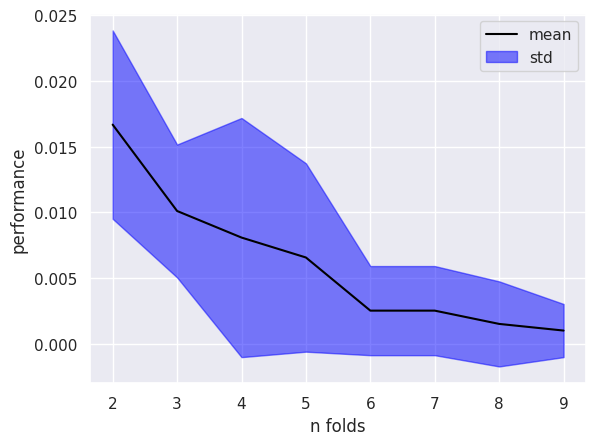

In [ ]:
def show_DecisionTreeClassifier():
    import numpy as np
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score


    X=df.values[:,:-1]
    y=df.values[:,-1]
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        est=DecisionTreeClassifier(max_depth=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_DecisionTreeClassifier()

#@title DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
X = df_enfermedades.values[:,:-1]
y = df_enfermedades.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
est = DecisionTreeClassifier(max_depth=24)
est.fit(X_train,y_train)
print("el accuracy es: %.3f"%accuracy_score(est.predict(X_test), y_test))


Accuracy para 2 folds - Media: 0.004545454545454545, Desviación estándar: 0.004195264577231351
Accuracy para 3 folds - Media: 0.0015151515151515152, Desviación estándar: 0.002314432169169616
Accuracy para 4 folds - Media: 0.0, Desviación estándar: 0.0
Accuracy para 5 folds - Media: 0.0, Desviación estándar: 0.0
Accuracy para 6 folds - Media: 0.0, Desviación estándar: 0.0
Accuracy para 7 folds - Media: 0.0, Desviación estándar: 0.0
Accuracy para 8 folds - Media: 0.0, Desviación estándar: 0.0
Accuracy para 9 folds - Media: 0.0, Desviación estándar: 0.0
el accuracy es:0.775


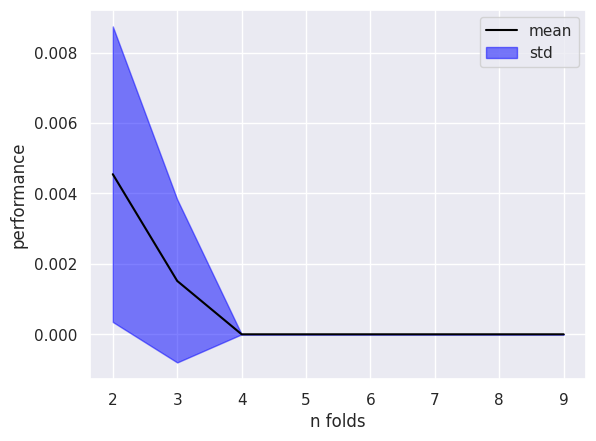

In [ ]:
def show_RandomForestClassifier():
    import numpy as np
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score


    X=df.values[:,:-1]
    y=df.values[:,-1]
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        est=RandomForestClassifier(max_depth=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_RandomForestClassifier()

#@title RamdonForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
X = df_enfermedades.values[:,:-1]
y = df_enfermedades.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
est = RandomForestClassifier()
est.fit(X_train,y_train)
print("el accuracy es:%.3f"%accuracy_score(est.predict(X_test), y_test))


Accuracy para 2 folds - Media: 0.011616161616161616, Desviación estándar: 0.00750811552894874
Accuracy para 3 folds - Media: 0.012626262626262628, Desviación estándar: 0.004071847347625531
Accuracy para 4 folds - Media: 0.013131313131313133, Desviación estándar: 0.006467802260033181
Accuracy para 5 folds - Media: 0.011111111111111112, Desviación estándar: 0.0063080787862610085
Accuracy para 6 folds - Media: 0.007070707070707072, Desviación estándar: 0.004628864338339232
Accuracy para 7 folds - Media: 0.013131313131313133, Desviación estándar: 0.005624004406899011
Accuracy para 8 folds - Media: 0.013131313131313133, Desviación estándar: 0.005150524761204833
Accuracy para 9 folds - Media: 0.010101010101010102, Desviación estándar: 0.004517309045454121
el accuracy es: 0.743


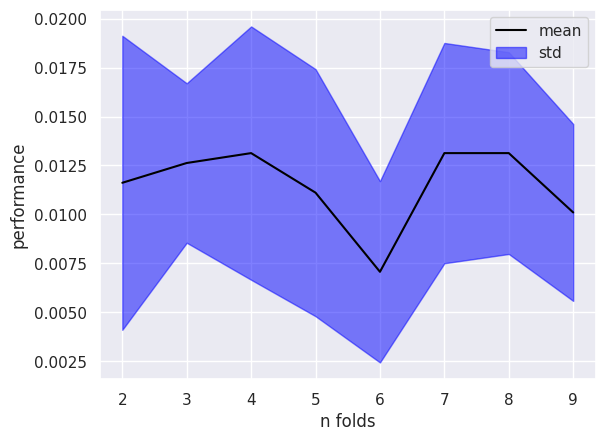

In [ ]:
def show_SVC():
    import numpy as np
    from sklearn.svm import SVC
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score


    X=df.values[:,:-1]
    y=df.values[:,-1]
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        est=SVC(kernel='rbf', degree=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVC()

#@title SVC rbf
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
X = df_enfermedades.values[:,:-1]
y = df_enfermedades.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
est = SVC()
est.fit(X_train,y_train)
print("el accuracy es: %.3f"%accuracy_score(est.predict(X_test), y_test))

Accuracy para 2 folds - Media: 0.013131313131313133, Desviación estándar: 0.00404040404040404
Accuracy para 3 folds - Media: 0.012626262626262628, Desviación estándar: 0.00723122275923048
Accuracy para 4 folds - Media: 0.013636363636363637, Desviación estándar: 0.0039445705433871995
Accuracy para 5 folds - Media: 0.013636363636363636, Desviación estándar: 0.010113628482071105
Accuracy para 6 folds - Media: 0.009090909090909092, Desviación estándar: 0.006700252101728081
Accuracy para 7 folds - Media: 0.012121212121212121, Desviación estándar: 0.006060606060606061
Accuracy para 8 folds - Media: 0.007575757575757578, Desviación estándar: 0.006869429549866386
Accuracy para 9 folds - Media: 0.011616161616161616, Desviación estándar: 0.0039445705433871995
el accuracy es: 0.761


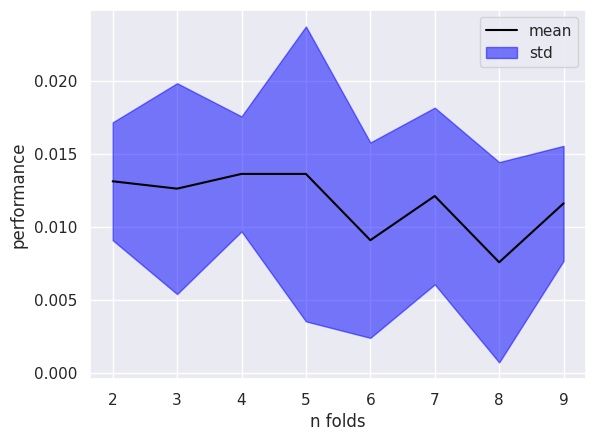

In [ ]:
def show_SVC():
    import numpy as np
    from sklearn.svm import SVC
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score


    X=df.values[:,:-1]
    y=df.values[:,-1]
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        est=SVC(kernel='linear', degree=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVC()

#@title SVC linear
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

est = SVC(kernel='linear')
est.fit(X_train,y_train)
print("el accuracy es: %.3f"%accuracy_score(est.predict(X_test), y_test))

Accuracy para 2 folds - Media: 0.013131313131313133, Desviación estándar: 0.00404040404040404
Accuracy para 3 folds - Media: 0.012626262626262628, Desviación estándar: 0.00723122275923048
Accuracy para 4 folds - Media: 0.013636363636363637, Desviación estándar: 0.0039445705433871995
Accuracy para 5 folds - Media: 0.013636363636363636, Desviación estándar: 0.010113628482071105
Accuracy para 6 folds - Media: 0.009090909090909092, Desviación estándar: 0.006700252101728081
Accuracy para 7 folds - Media: 0.012121212121212121, Desviación estándar: 0.006060606060606061
Accuracy para 8 folds - Media: 0.007575757575757578, Desviación estándar: 0.006869429549866386
Accuracy para 9 folds - Media: 0.011616161616161616, Desviación estándar: 0.0039445705433871995
el accuracy es: 0.690


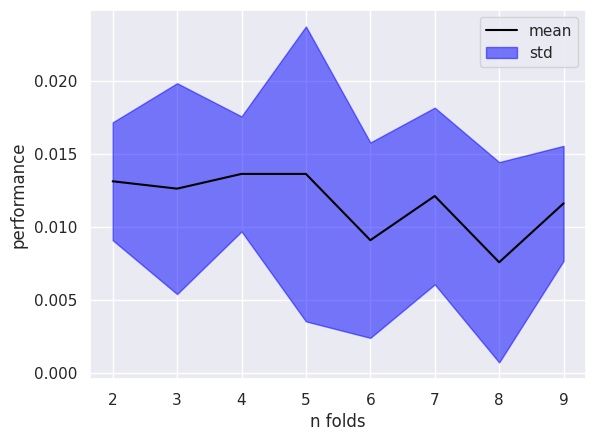

In [ ]:
def show_SVC():
    import numpy as np
    from sklearn.svm import SVC
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score


    X=df.values[:,:-1]
    y=df.values[:,-1]
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        est=SVC(kernel='linear', degree=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVC()

#@title SVC poly
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X = df_enfermedades.values[:,:-1]
y = df_enfermedades.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
est = SVC(kernel='poly', degree=7)
est.fit(X_train,y_train)
print("el accuracy es: %.3f"%accuracy_score(est.predict(X_test), y_test))

# RandomForest, DecisionTree, Supportvector para Regresión

Accuracy para 2 folds - Media: 33.72678934831539, Desviación estándar: 2.0177730526142184
Accuracy para 3 folds - Media: 33.98129786717124, Desviación estándar: 1.6415942599662525
Accuracy para 4 folds - Media: 34.270629388506364, Desviación estándar: 1.7010186997801842
Accuracy para 5 folds - Media: 34.79109435572344, Desviación estándar: 2.787875447318599
Accuracy para 6 folds - Media: 35.41860681636494, Desviación estándar: 2.0163367446093567
Accuracy para 7 folds - Media: 35.595271038354966, Desviación estándar: 1.8786738132442697
Accuracy para 8 folds - Media: 36.05815039468251, Desviación estándar: 2.519181816345297
Accuracy para 9 folds - Media: 36.55770442590458, Desviación estándar: 2.2776606537231903


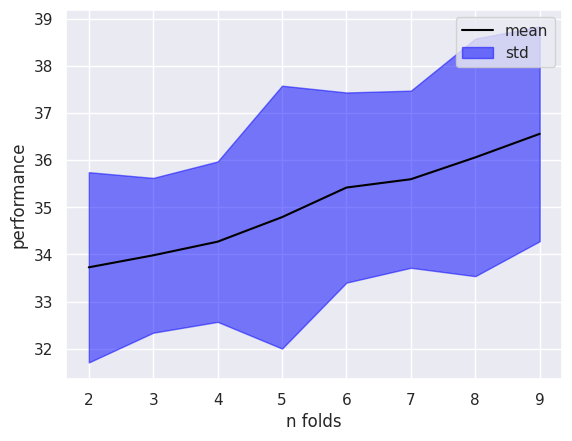

In [ ]:
#@title  RandomForestRegressor
def show_RandomForestRegressor():
    import numpy as np
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error


    X=df.values[:,:-1]
    y=df.values[:,-1]
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        est=RandomForestRegressor(max_depth=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_RandomForestRegressor()



Accuracy para 2 folds - Media: 33.77096927654428, Desviación estándar: 2.006347642331955
Accuracy para 3 folds - Media: 34.15796908501345, Desviación estándar: 1.3005755188088663
Accuracy para 4 folds - Media: 34.445982150267355, Desviación estándar: 1.6055337418865165
Accuracy para 5 folds - Media: 34.96518248323084, Desviación estándar: 1.9175190159400495
Accuracy para 6 folds - Media: 35.55937344250104, Desviación estándar: 2.275080064790059
Accuracy para 7 folds - Media: 35.96421984001809, Desviación estándar: 2.3482011032619807
Accuracy para 8 folds - Media: 36.09698647071703, Desviación estándar: 1.5506967329135968
Accuracy para 9 folds - Media: 36.48030376227015, Desviación estándar: 3.5234583065370297


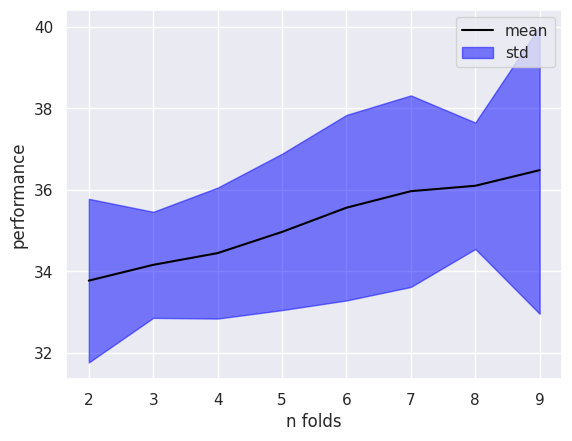

In [ ]:
#@title DecisionTree
def show_DecisionTreeRegressor():
    import numpy as np
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error


    X=df.values[:,:-1]
    y=df.values[:,-1]
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        est=DecisionTreeRegressor(max_depth=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_DecisionTreeRegressor()


Accuracy para 2 folds - Media: 33.669097686237684, Desviación estándar: 1.9376865343348832
Accuracy para 3 folds - Media: 33.7097754578806, Desviación estándar: 1.299262693595415
Accuracy para 4 folds - Media: 33.715498587786996, Desviación estándar: 1.7338524361354193
Accuracy para 5 folds - Media: 33.64284445887697, Desviación estándar: 2.0318677357618538
Accuracy para 6 folds - Media: 33.65682408279306, Desviación estándar: 2.166066551090458
Accuracy para 7 folds - Media: 33.94077204642812, Desviación estándar: 1.853890647247851
Accuracy para 8 folds - Media: 33.72097612362823, Desviación estándar: 1.4750154671821716
Accuracy para 9 folds - Media: 33.8369422484724, Desviación estándar: 3.1038432583770192


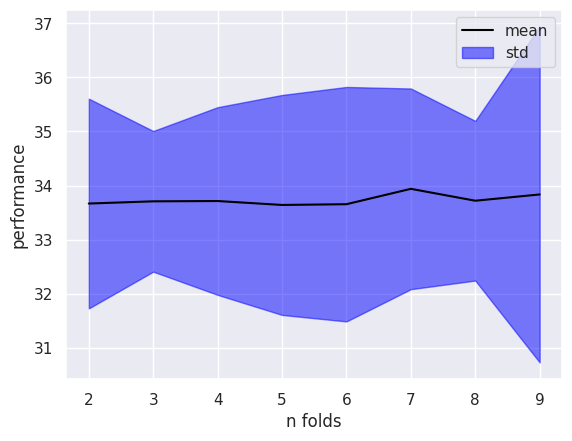

In [ ]:
#@title  SVC linear
def show_SVC():
    import numpy as np
    from sklearn.svm import SVR
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error


    X=df.values[:,:-1]
    y=df.values[:,-1]
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        est=SVR(kernel='linear')
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVC()


Accuracy para 2 folds - Media: 33.68573551567296, Desviación estándar: 1.9024685029024861
Accuracy para 3 folds - Media: 33.74969649550225, Desviación estándar: 1.2818203335242864
Accuracy para 4 folds - Media: 33.75476925004432, Desviación estándar: 1.7107202407406485
Accuracy para 5 folds - Media: 33.7612086561463, Desviación estándar: 2.085196386052662
Accuracy para 6 folds - Media: 33.900902687215684, Desviación estándar: 2.1391470692697214
Accuracy para 7 folds - Media: 34.14223474952248, Desviación estándar: 1.9975130829433425
Accuracy para 8 folds - Media: 34.0000004563282, Desviación estándar: 1.4377741808304316
Accuracy para 9 folds - Media: 34.28944956093691, Desviación estándar: 3.246566990188179


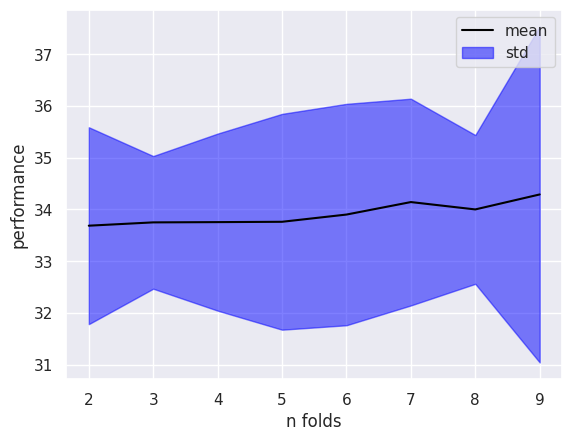

In [ ]:
#@title  SVC poly
def show_SVC():
    import numpy as np
    from sklearn.svm import SVR
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error


    X=df.values[:,:-1]
    y=df.values[:,-1]
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        est=SVR(kernel='poly', degree=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVC()


Accuracy para 2 folds - Media: 5.819557590690579, Desviación estándar: 0.1689493448583132
Accuracy para 3 folds - Media: 5.8202171325534735, Desviación estándar: 0.11335643471166461
Accuracy para 4 folds - Media: 5.816042677161185, Desviación estándar: 0.15002804100428183
Accuracy para 5 folds - Media: 5.817393435029618, Desviación estándar: 0.1753564193182309
Accuracy para 6 folds - Media: 5.814593414252036, Desviación estándar: 0.18704227912302548
Accuracy para 7 folds - Media: 5.828336503579026, Desviación estándar: 0.16208539314222364
Accuracy para 8 folds - Media: 5.818849858150919, Desviación estándar: 0.13146035091145516
Accuracy para 9 folds - Media: 5.817953512415902, Desviación estándar: 0.2723821701645462
Accuracy para 10 folds - Media: 5.8246985857045255, Desviación estándar: 0.14334505651545051
Accuracy para 11 folds - Media: 5.822405385123782, Desviación estándar: 0.20580860966588835
Accuracy para 12 folds - Media: 5.818319938595492, Desviación estándar: 0.138853118079921

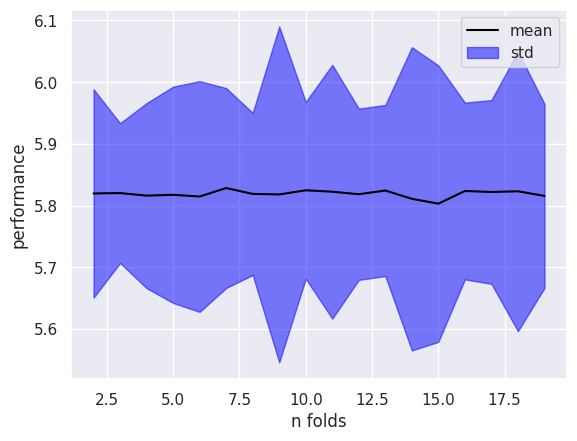

In [ ]:
#@title  SVC rbf
def show_SVC():
    import numpy as np
    from sklearn.svm import SVR
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error

    X=df.values[:,:-1]
    y=df.values[:,-1]
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,20)
    for nfolds in nfolds_range:
        est=SVR(kernel='rbf', degree=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        s=np.sqrt(s)
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVC()


# MSE, RMSE, MAE

MSE depth split data  0.632
RMSE depth split data  0.795
MAE depth split data  0.570


Text(0.5, 1.0, 'showing only some random 40 test elements (BLACK line is error)')

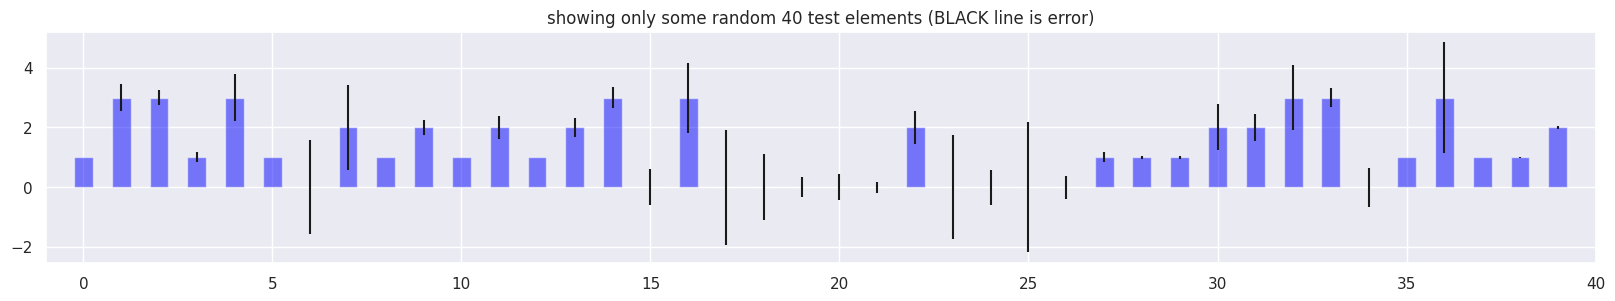

In [ ]:
#@title RandomForest
from sklearn.ensemble import RandomForestRegressor

np.random.seed(10)
X = df_enfermedades.values[:,:-1]
y = df_enfermedades.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))
plt.figure(figsize=(20,3))
preds = regressor.predict(X_test)
errs  = np.abs(y_test - preds)
perm = np.random.permutation(range(len(y_test)))[:40]
plt.bar(range(len(perm)), y_test[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

MSE depth split data  1.268
RMSE depth split data  1.126
MAE depth split data  0.581


Text(0.5, 1.0, 'showing only some random 40 test elements (BLACK line is error)')

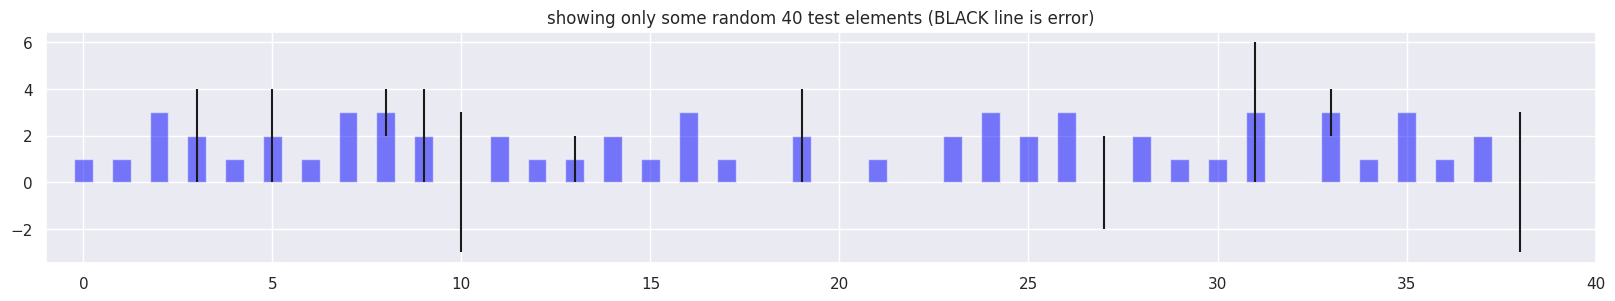

In [ ]:
#@title Decision Tree
from sklearn.tree import DecisionTreeRegressor

np.random.seed(10)
X = df_enfermedades.values[:,:-1]
y = df_enfermedades.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))
plt.figure(figsize=(20,3))
preds = regressor.predict(X_test)
errs  = np.abs(y_test - preds)
perm = np.random.permutation(range(len(y_test)))[:40]
plt.bar(range(len(perm)), y_test[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

MSE depth split data  2.282
RMSE depth split data  1.511
MAE depth split data  1.096


Text(0.5, 1.0, 'showing only some random 40 test elements (BLACK line is error)')

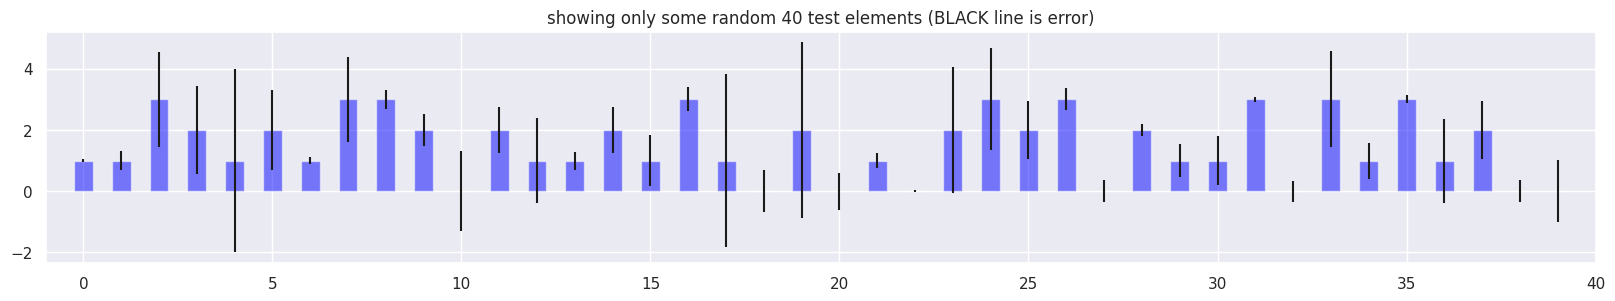

In [ ]:
#@title SVR Linear
from sklearn.svm import SVR

np.random.seed(10)
X = df_enfermedades.values[:,:-1]
y = df_enfermedades.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))
plt.figure(figsize=(20,3))
preds = regressor.predict(X_test)
errs  = np.abs(y_test - preds)
perm = np.random.permutation(range(len(y_test)))[:40]
plt.bar(range(len(perm)), y_test[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

MSE depth split data  145.486
RMSE depth split data  12.062
MAE depth split data  3.882


Text(0.5, 1.0, 'showing only some random 40 test elements (BLACK line is error)')

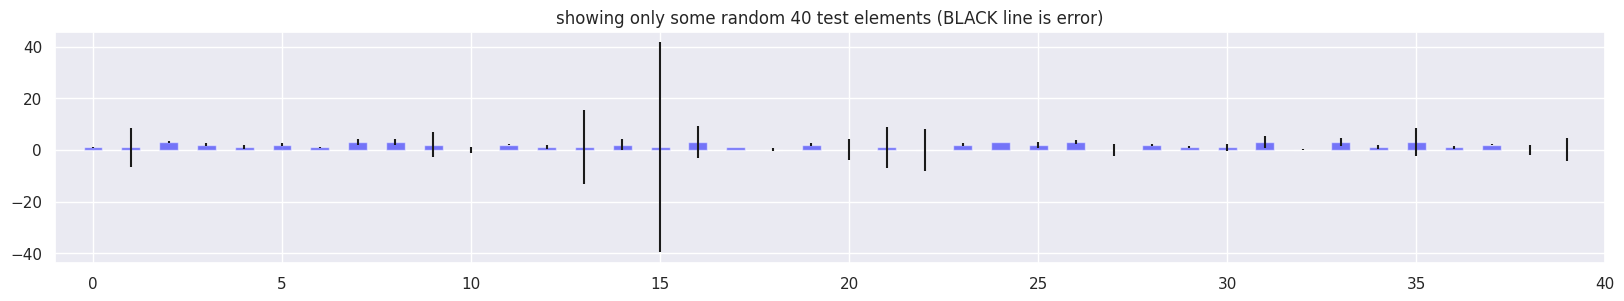

In [ ]:
#@title SVR Poly
from sklearn.svm import SVR

np.random.seed(10)
X = df_enfermedades.values[:,:-1]
y = df_enfermedades.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = SVR(kernel='poly', degree=7)
regressor.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))
plt.figure(figsize=(20,3))
preds = regressor.predict(X_test)
errs  = np.abs(y_test - preds)
perm = np.random.permutation(range(len(y_test)))[:40]
plt.bar(range(len(perm)), y_test[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

MSE depth split data  0.748
RMSE depth split data  0.865
MAE depth split data  0.576


Text(0.5, 1.0, 'showing only some random 40 test elements (BLACK line is error)')

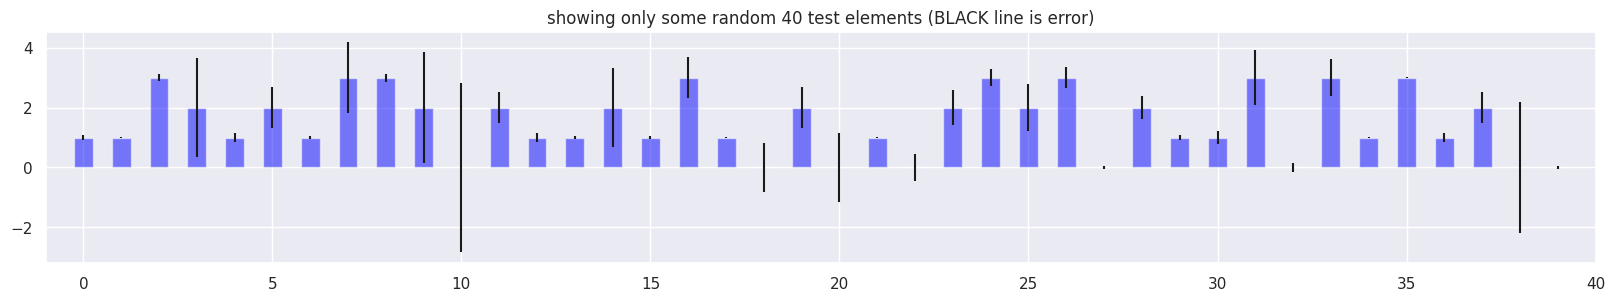

In [ ]:
#@title SVR RBF
from sklearn.svm import SVR

np.random.seed(10)
X = df_enfermedades.values[:,:-1]
y = df_enfermedades.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

regressor = SVR(kernel='rbf', degree=7)
regressor.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))
plt.figure(figsize=(20,3))
preds = regressor.predict(X_test)
errs  = np.abs(y_test - preds)
perm = np.random.permutation(range(len(y_test)))[:40]
plt.bar(range(len(perm)), y_test[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

# Deep learning


***DNN con PCA***

Epoch 1/20
675/675 [==============================] - 12s 14ms/step - loss: 0.7485 - accuracy: 0.6986 - val_loss: 0.5585 - val_accuracy: 0.7642
Epoch 2/20
675/675 [==============================] - 6s 9ms/step - loss: 0.5993 - accuracy: 0.7451 - val_loss: 0.7527 - val_accuracy: 0.7322
Epoch 3/20
675/675 [==============================] - 4s 6ms/step - loss: 0.5524 - accuracy: 0.7736 - val_loss: 0.6068 - val_accuracy: 0.7476
Epoch 4/20
675/675 [==============================] - 4s 6ms/step - loss: 0.5440 - accuracy: 0.7881 - val_loss: 0.5913 - val_accuracy: 0.7654
Epoch 5/20
675/675 [==============================] - 6s 9ms/step - loss: 0.4766 - accuracy: 0.8085 - val_loss: 0.6285 - val_accuracy: 0.7749
Epoch 6/20
675/675 [==============================] - 5s 7ms/step - loss: 0.4686 - accuracy: 0.8139 - val_loss: 0.5910 - val_accuracy: 0.7903
Epoch 7/20
675/675 [==============================] - 4s 6ms/step - loss: 0.4285 - accuracy: 0.8343 - val_loss: 0.6378 - val_accuracy: 0.7784
Epoc

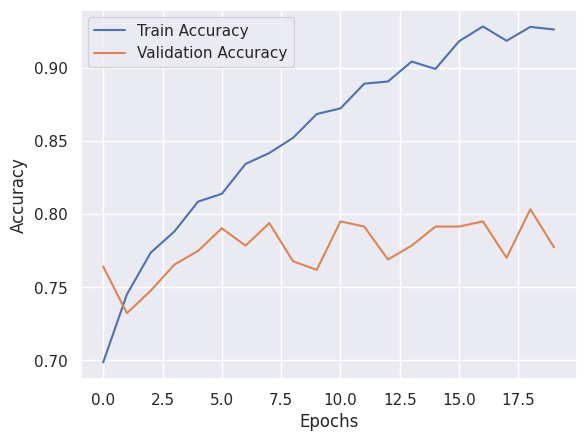

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=21)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = np.array(y_train, dtype=float)
y_test = np.array(y_test, dtype=float)

n_components=28
pca = PCA(n_components= n_components, whiten=True)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(n_components,), name="flatten_input"),
    tf.keras.layers.Dense(8192, activation="relu"),
    tf.keras.layers.Dense(len(list(np.unique(y_train))), activation="softmax"),
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=20, batch_size=5,validation_data=(X_test, y_test))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('PARA', n_components, 'COMPONENTES')
print('-----------------------------------------------------------------------------')

In [ ]:
predictions = model.predict(X_test)
print(predictions[600])
print("valor predicho:",  np.argmax(predictions[600]), "max prob: ", np.max(predictions[600]),
      "ground truth: ", y_test[600] )

27/27 [==============================] - 0s 3ms/step
[9.0925867e-05 6.3811005e-03 2.6638532e-01 7.2714269e-01]
valor predicho: 3 max prob:  0.7271427 ground truth:  3.0


# Aprendizaje no supervisado

In [ ]:
X, y = train_test_split(df_enfermedades, test_size=0.2, random_state=42)

print('train', X.shape)
print('test', y.shape)


Components = 2
pca_breast = PCA(n_components= Components, whiten=True)
pca_breast.fit(X)
X_train = pca_breast.transform(X)
X_test = pca_breast.transform(y)

print('train post reduccion', X_train.shape)
print('test post reduccion', X_test.shape)
kmeans = KMeans(n_clusters=20)
kmeans.fit(X_train)

train (3374, 10001)
test (844, 10001)
train post reduccion (3374, 2)
test post reduccion (844, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(20, 2)
(3374,)


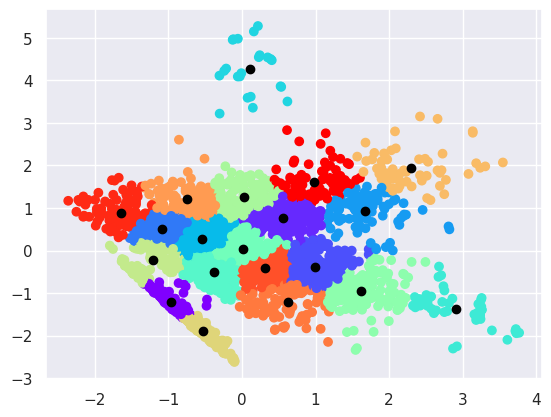

In [ ]:
#@title Kmeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(X_train)

# Obtiene las etiquetas asignadas por KMeans
labels_train = kmeans.predict(X_train)

# Visualiza los resultados
plt.scatter(X_train[:,0],X_train[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
print(kmeans.cluster_centers_.shape)
print(kmeans.labels_.shape)

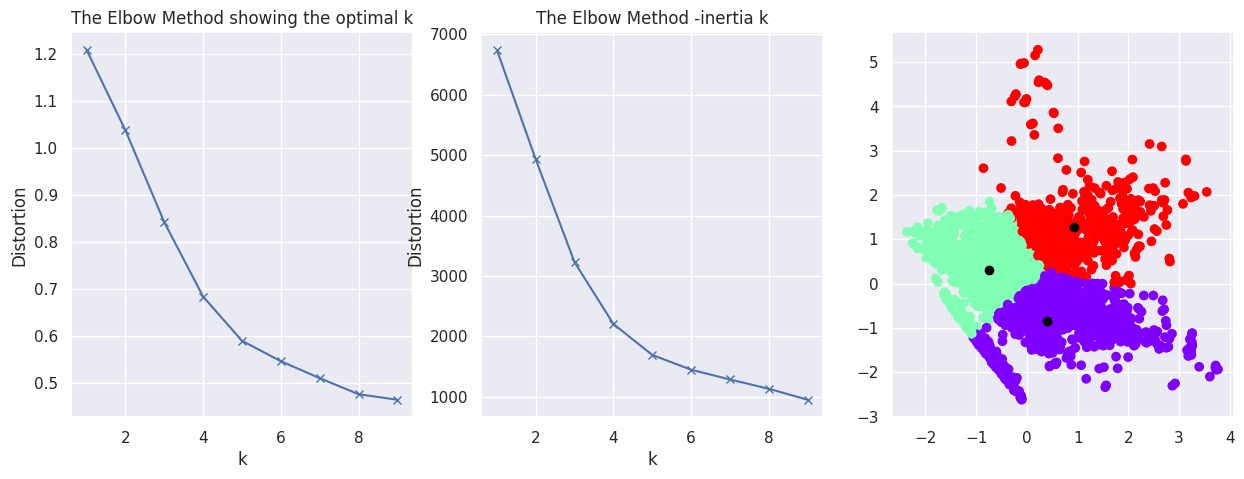

In [ ]:
#@title metodo del codo

from scipy.spatial.distance import cdist

distortions = []
wss = [] #Within-Cluster-Sum of Squared
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto').fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])
    wss.append(kmeanModel.inertia_)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(K, distortions, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.subplot(132)
plt.plot(K, wss, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
plt.title('The Elbow Method -inertia k')
plt.subplot(133)
kmeanModel = KMeans(n_clusters=3, n_init='auto').fit(X_train)
kmeanModel.fit(X_train)
plt.scatter(X_train[:,0], X_train[:,1], c=kmeanModel.labels_, cmap='rainbow');
plt.scatter(kmeanModel.cluster_centers_[:,0] ,kmeanModel.cluster_centers_[:,1], color='black')

<ipython-input-29-8f4a22574be3>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow');


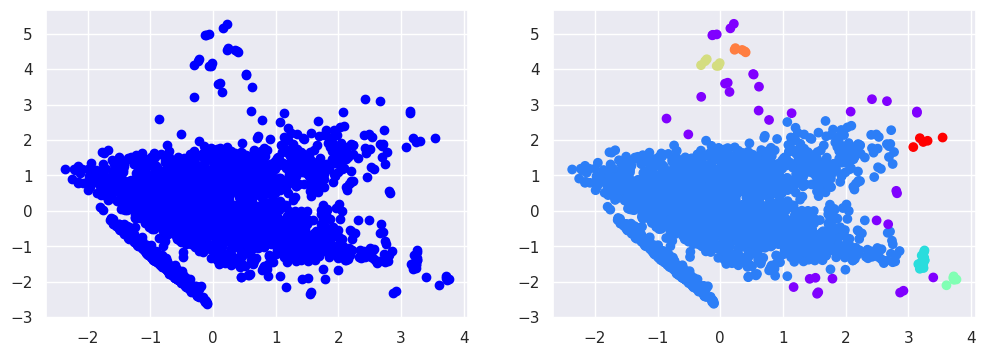

In [ ]:
#@title DBscan
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_train) #mean zero and variance one

DBS = DBSCAN(eps=.3)
DBS.fit(X)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], c="blue", cmap='rainbow');
plt.subplot(122)
plt.scatter(X[:,0],X[:,1], c=DBS.labels_, cmap='rainbow');

# PCA y T-sne

Text(0.5, 1.0, 'PCA Visualization')

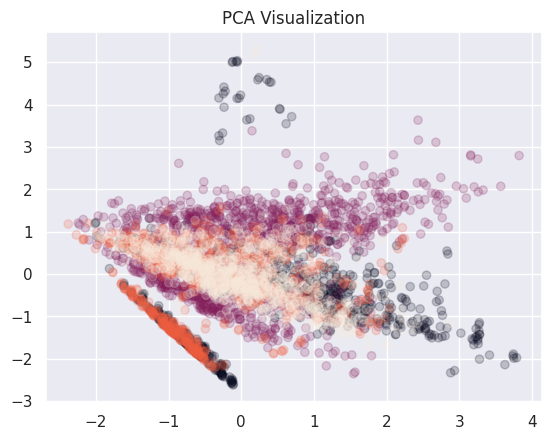

In [ ]:
y=df_enfermedades['enfermedades']
data=df_enfermedades.drop(columns=['enfermedades'])

pca_breast = PCA(n_components= 2, whiten=True)
X_pca = pca_breast.fit_transform(data)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y, alpha=0.2)
plt.title('PCA Visualization')

In [ ]:
import plotly.express as px
pca_senas = PCA(n_components= 3, whiten=True)
X_pca = pca_senas.fit_transform(X)


fig = px.scatter_3d(x=X_pca[:,0], y=X_pca[:,1], z=X_pca[:,2], color=y)
fig.show()

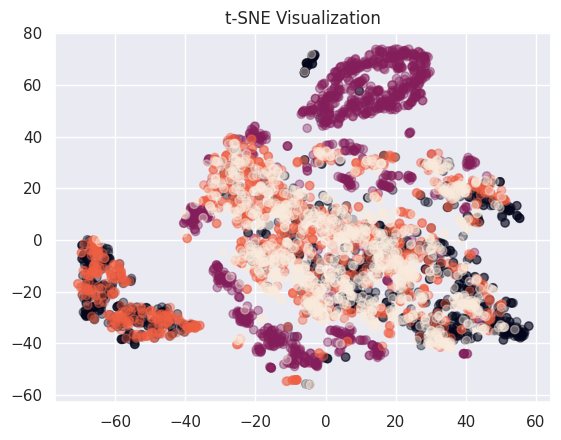

In [ ]:
y=df_enfermedades['enfermedades']
data=df_enfermedades.drop(columns=['enfermedades'])

# Inicializar el modelo t-SNE
tsne = TSNE(n_components=2,learning_rate='auto')

# Aplicar t-SNE al conjunto de datos
X_tsne = tsne.fit_transform(data)

# Graficar los resultados
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y,alpha=0.4)
plt.title('t-SNE Visualization')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne_senas = TSNE(n_components=3, learning_rate="auto")
X_senas = tsne_senas.fit_transform(X)
fig = px.scatter_3d(x=X_senas[:,0], y=X_senas[:,1], z=X_senas[:,2], color=y)
fig.show()

# Tsne,PCA y Deep learning del dataset de las personas

In [22]:
# Seleccionar las columnas numéricas relevantes para PCA
features = df_concatenado[['Age', 'Gender']]

# Estandarizar los datos
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenar los resultados de PCA con el DataFrame original
df_concatenado = pd.concat([df_concatenado, df_pca], axis=1)

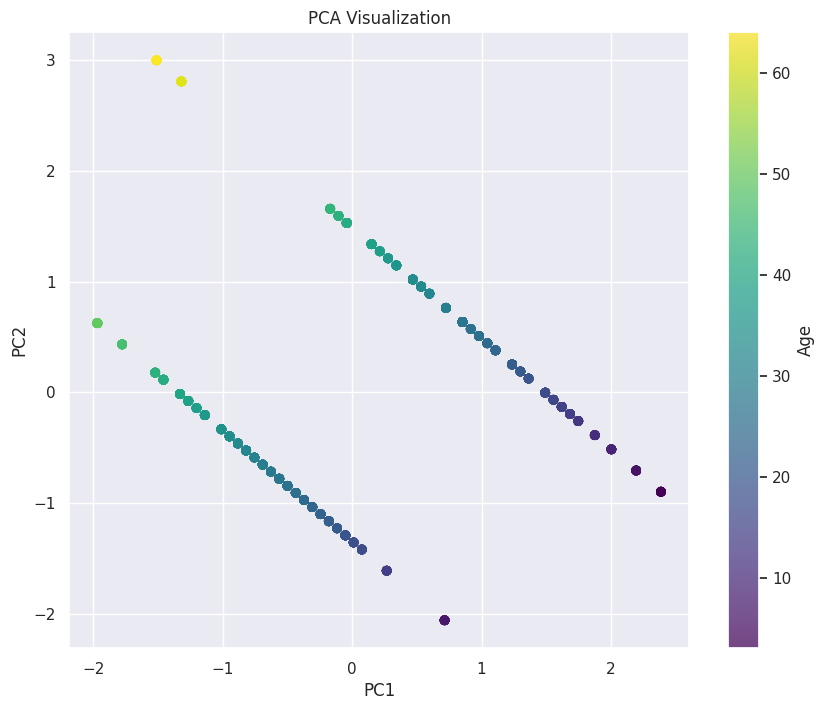

In [34]:
# Graficar el resultado de PCA
plt.figure(figsize=(10, 8))
plt.scatter(df_concatenado['PC1'], df_concatenado['PC2'], c=df_concatenado['Age'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Age')
plt.title('PCA Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [23]:
df_concatenado['Age'] = pd.to_numeric(df_concatenado['Age'], errors='coerce')

# Seleccionar las columnas numéricas relevantes para t-SNE
features_tsne = df_concatenado[['Age', 'Gender']]

# Estandarizar los datos
scaler_tsne = StandardScaler()
features_standardized_tsne = scaler_tsne.fit_transform(features_tsne)

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(features_standardized_tsne)
df_tsne = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])

# Eliminar posibles duplicados antes de la concatenación
df_concatenado = df_concatenado.loc[:,~df_concatenado.columns.duplicated()]
df_concatenado = pd.concat([df_concatenado, df_tsne], axis=1)

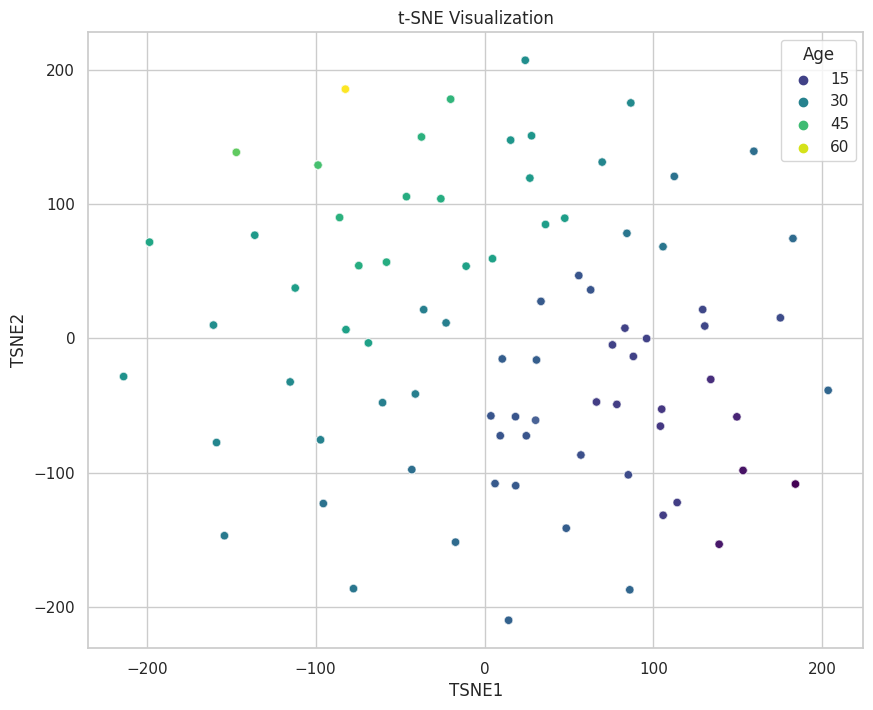

In [24]:
# Configuración de estilo seaborn (opcional, pero hace que los gráficos sean más atractivos)
sns.set(style="whitegrid")

# Graficar el resultado de t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', data=df_concatenado, palette='viridis', hue='Age', alpha=0.7)
plt.title('t-SNE Visualization')
plt.show()

In [25]:
from PIL import Image

def load_and_preprocess_image(image_path, target_size):
    # Cargar la imagen desde la ruta
    img = Image.open(image_path)

    # Redimensionar la imagen al tamaño objetivo
    img = img.resize(target_size)

    # Convertir la imagen a un array NumPy
    img_array = np.asarray(img, dtype="float32")

    # Normalizar los valores de píxeles al rango [0, 1]
    img_array /= 255.0

    return img_array


In [27]:
print(df_concatenado['Age'].unique())

[49. 61. 23. 43.  9. 41. 39. 27. 20. 34. 16. 29. 31. 19. 17. 33. 26. 32.
 24. 36. 38. 21. 28. 30. 35. 37. 18. 42. 11. 64. 25.  7. 15. 13. 22.  6.
  3. 46. 14.]


In [33]:
df_concatenado['Age'] = df_concatenado['Age'].astype(float)

# Preprocesar las imágenes (este es solo un ejemplo, ajusta según tus necesidades)
image_size = (224, 224)  # Ajusta el tamaño de la imagen según tus necesidades
images = []

for image_path in df_concatenado['Photos']:
    image = load_and_preprocess_image(image_path, image_size)
    images.append(image)

X_images = np.array(images)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_images, df_concatenado['Age'], test_size=0.2, random_state=42
)

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Salida para la edad (ajusta según tus necesidades)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
50/50 [==============================] - 79s 2s/step - loss: 315.4264 - val_loss: 131.3533
Epoch 2/10
50/50 [==============================] - 73s 1s/step - loss: 128.6445 - val_loss: 124.0835
Epoch 3/10
50/50 [==============================] - 73s 1s/step - loss: 119.1779 - val_loss: 121.9390
Epoch 4/10
50/50 [==============================] - 76s 2s/step - loss: 108.2038 - val_loss: 121.5852
Epoch 5/10
50/50 [==============================] - 77s 2s/step - loss: 101.8563 - val_loss: 120.9493
Epoch 6/10
50/50 [==============================] - 73s 1s/step - loss: 107.0113 - val_loss: 115.7749
Epoch 7/10
50/50 [==============================] - 82s 2s/step - loss: 88.4686 - val_loss: 114.1208
Epoch 8/10
50/50 [==============================] - 78s 2s/step - loss: 81.6010 - val_loss: 115.0871
Epoch 9/10
50/50 [==============================] - 85s 2s/step - loss: 74.4741 - val_loss: 115.4505
Epoch 10/10
50/50 [==============================] - 77s 2s/step - loss: 65.1320 - va

13/13 [==============================] - 8s 551ms/step


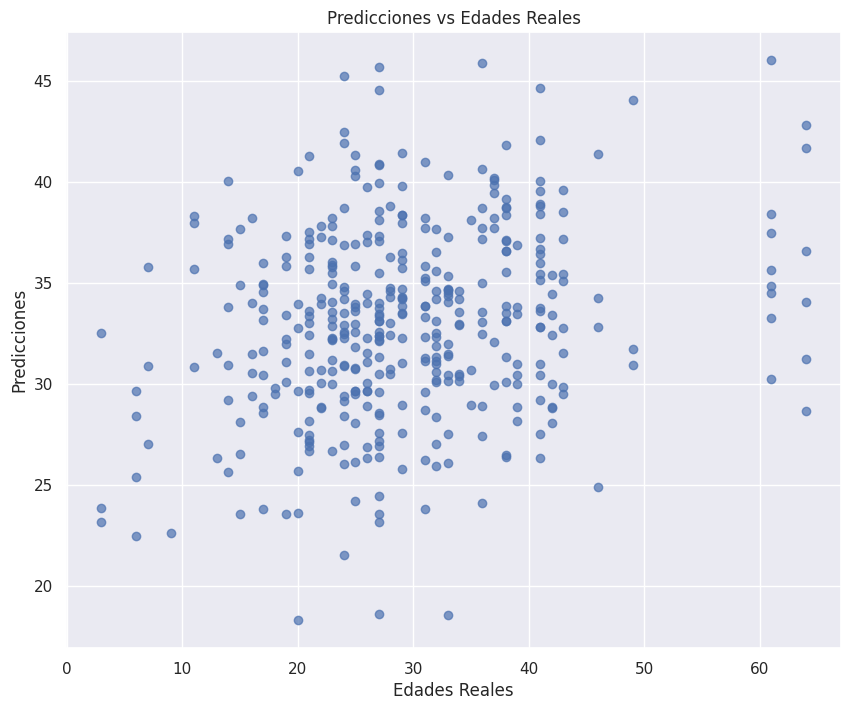

In [35]:
import matplotlib.pyplot as plt

# Obtener predicciones del modelo en el conjunto de prueba
y_pred = model.predict(X_test).flatten()

# Graficar las predicciones vs edades reales
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Predicciones vs Edades Reales')
plt.xlabel('Edades Reales')
plt.ylabel('Predicciones')
plt.show()

# Conclusiones

## Conclusiones dataset de enfermedades

* Se llevó a cabo un proceso de tratamiento de datos para procesar las imágenes,
permitiendo un análisis más efectivo. Esto posibilitó la implementación de diversos procesos de aprendizaje automático, ya sea regresión o clasificación, con un enfoque más preciso y detallado.

* Se seleccionaron los resultados de la regresión de varios métodos, los cuales proporcionaron un porcentaje que muestra el método más óptimo para implementar en este conjunto de datos. Esto nos permitirá predecir qué enfermedad podría estar presente en los datos proporcionados por el conjunto de datos.

* Se notó que el conjunto de datos se estructura de manera similar a nubes, lo que facilita el uso de Kmeans para un aprendizaje no supervisado. Este algoritmo se adapta de manera óptima a este tipo de agrupación de datos, permitiendo un análisis más preciso.

* Se evidencia que PCA reduce la complejidad de los datos al identificar las direcciones con mayor variabilidad. Por otro lado, t-SNE conserva las relaciones cercanas entre puntos al trasladarlos a un espacio de menor dimensión.

* Además, se aprecia que t-SNE facilita una agrupación más nítida y definida de conjuntos de puntos pertenecientes a diferentes grupos, permitiendo una visualización más clara de sus relaciones.


## Conclusiones de datasets de personas

* Con respecto al analisis grafico de tsne y pca, podemos afirmar que los datos de las personas extentes en el dataset estan bastante distribuidos y no hay un patron entre ellos.
* En cuanto al modelo de aprendizaje profundo, éste parece aprender, pero podría haber signos de cierta dificultad para generalizar bien a nuevos datos, especialmente a medida que avanza el entrenamiento.